### Importación de datos



In [56]:
import pandas as pd
!pip install folium
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [57]:
# Ventas por tiendas
Ventas_totales = tienda['Precio'].sum()
Ventas_totales2 = tienda2['Precio'].sum()
Ventas_totales3 = tienda3['Precio'].sum()
Ventas_totales4 = tienda4['Precio'].sum()

print (f" \n tienda 1 facturó en total: ¢{Ventas_totales:,.2f},\n tienda 2 facturó en total: ¢{Ventas_totales2:,.2f}, \n tienda 3 facturó en total: ¢{Ventas_totales3:,.2f}, \n tienda 4 facturó en total: ¢{Ventas_totales4:,.2f}")



 
 tienda 1 facturó en total: ¢1,150,880,400.00,
 tienda 2 facturó en total: ¢1,116,343,500.00, 
 tienda 3 facturó en total: ¢1,098,019,600.00, 
 tienda 4 facturó en total: ¢1,038,375,700.00


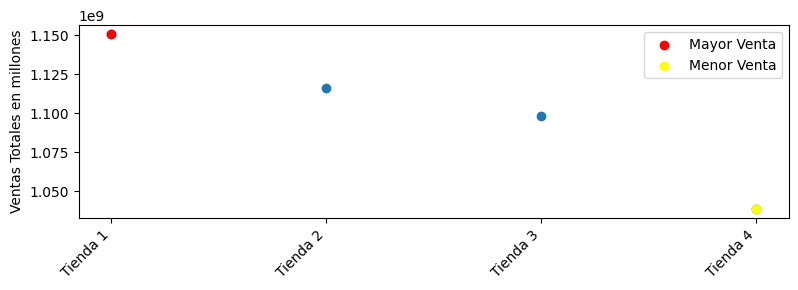

In [58]:
# gráfico de puntos según ventas totales

# Datos de ventas por tienda
ventas = {
    'Tienda 1': Ventas_totales,
    'Tienda 2': Ventas_totales2,
    'Tienda 3': Ventas_totales3,
    'Tienda 4': Ventas_totales4
}

# Crear el gráfico de puntos
tiendas = list(ventas.keys())
totales = list(ventas.values())

plt.figure(figsize=(8, 3))
plt.scatter(tiendas, totales)

# Encontrar la tienda con mayores y menores ventas
max_venta = max(ventas, key=ventas.get)
min_venta = min(ventas, key=ventas.get)

# Marcar los puntos de mayor y menor venta
plt.scatter(max_venta, ventas[max_venta], color='red', label='Mayor Venta')
plt.scatter(min_venta, ventas[min_venta], color='yellow', label='Menor Venta')

plt.ylabel('Ventas Totales en millones')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x
plt.legend()
plt.tight_layout() # Ajusta el diseño para evitar superposición
plt.show()


In [59]:
# costo del envío por Tienda
envio = tienda['Costo de envío'].sum()
envio2 = tienda2['Costo de envío'].sum()
envio3 = tienda3['Costo de envío'].sum()
envio4 = tienda4['Costo de envío'].sum()

print (f" \n tienda 1 facturó en total: ¢{envio:,.2f},\n tienda 2 facturó en total: ¢{envio2:,.2f}, \n tienda 3 facturó en total: ¢{envio3:,.2f}, \n tienda 4 facturó en total: ¢{envio4:,.2f}")


 
 tienda 1 facturó en total: ¢61,377,900.00,
 tienda 2 facturó en total: ¢59,485,100.00, 
 tienda 3 facturó en total: ¢58,516,600.00, 
 tienda 4 facturó en total: ¢55,317,400.00


In [60]:
# Ventas con envío
ventas = {
    'Tienda # 1': Ventas_totales + envio,
    'Tienda # 2': Ventas_totales2 + envio2,
    'Tienda # 3': Ventas_totales3 + envio3,
    'Tienda # 4': Ventas_totales4 + envio4
}
envios = {
    'Tienda # 1': envio,
    'Tienda # 2': envio2,
    'Tienda # 3': envio3,
    'Tienda # 4': envio4
}

mayor_envios = max(envios, key=envios.get)
lider_envios = envios[mayor_envios]

# Buscar la tienda con mayor ventas
tienda_mayor = max(ventas, key=ventas.get)
mayor_valor = ventas[tienda_mayor]

print (f"\n La tienda lider de envíos es {mayor_envios} en envíos ¢{lider_envios:,.2f}")
print (f"\nLa tienda que más facturó con envío fue: {tienda_mayor} con ¢{mayor_valor:,.2f}")


 La tienda lider de envíos es Tienda # 1 en envíos ¢61,377,900.00

La tienda que más facturó con envío fue: Tienda # 1 con ¢1,212,258,300.00


In [61]:
tiendas = {
    'Tienda # 1': Ventas_totales + envio,
    'Tienda # 2': Ventas_totales2 + envio2,
    'Tienda # 3': Ventas_totales3 + envio3,
    'Tienda # 4': Ventas_totales4 + envio4
}

# Crear DataFrames
tienda = pd.DataFrame(tienda)
tienda2 = pd.DataFrame(tienda2)
tienda3 = pd.DataFrame(tienda3)
tienda4 = pd.DataFrame(tienda4)


In [69]:
# agrupar Productos según categoría del producto y total por categoría de cada tienda por separado

# Concatenate all DataFrames into one
all_stores = pd.concat([tienda, tienda2, tienda3, tienda4], keys=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], names=['Tienda'])

# Group by store, category, and sum the prices
sales_by_category = all_stores.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum().reset_index()

sales_by_category


,Tienda,Categoría del Producto,Precio
0,Tienda 1,Artículos para el hogar,12698400.0
1,Tienda 1,Deportes y diversión,39290000.0
2,Tienda 1,Electrodomésticos,363685200.0
3,Tienda 1,Electrónicos,429493500.0
4,Tienda 1,Instrumentos musicales,91299000.0
5,Tienda 1,Juguetes,17995700.0
6,Tienda 1,Libros,8784900.0
7,Tienda 1,Muebles,187633700.0
8,Tienda 2,Artículos para el hogar,14746900.0
9,Tienda 2,Deportes y diversión,34744500.0


In [70]:
# de las 4 categorias mostrar sus valores y crear gráfico de barras horizontales según tiendas

import altair as alt

top_categories = sales_by_category.groupby('Tienda').apply(lambda x: x.nlargest(4, 'Precio')).reset_index(drop=True)

chart = alt.Chart(top_categories).mark_bar().encode(
    y=alt.Y('Tienda:N', sort='-x'),  # Sort bars by price in descending order
    x=alt.X('Precio:Q', title='Precio'),
    color='Categor\u00eda del Producto:N',
    tooltip=['Tienda', 'Categor\u00eda del Producto', 'Precio']
).properties(
    title='Top 4 Categorías por Tienda',
    width=600,
    height=400
)
chart


<ipython-input-70-b510a3e471a9>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories = sales_by_category.groupby('Tienda').apply(lambda x: x.nlargest(4, 'Precio')).reset_index(drop=True)


alt.Chart(...)

# 3. Calificación promedio de la tienda


In [ ]:
# puntos totales de Calificación por tiendas
calificacion = tienda['Calificación'].sum()
calificacion2 = tienda2['Calificación'].sum()
calificacion3 = tienda3['Calificación'].sum()
calificacion4 = tienda4['Calificación'].sum()

print (f" \n tienda 1 obtuvo un total de calificaciones de: {calificacion:}\n tienda 2 obtuvo un total de calificaciones de: { calificacion2} \n tienda 3 obtuvo un total de calificaciones de: { calificacion3:} \n tienda 4 obtuvo un total de calificaciones de: { calificacion4}")

 
 tienda 1 obtuvo un total de calificaciones de: 9381
 tienda 2 obtuvo un total de calificaciones de: 9524 
 tienda 3 obtuvo un total de calificaciones de: 9550 
 tienda 4 obtuvo un total de calificaciones de: 9422


In [ ]:
calificaciontotales = {
    'Tienda # 1': calificacion,
    'Tienda # 2': calificacion2,
    'Tienda # 3': calificacion3,
    'Tienda # 4': calificacion4
}

In [ ]:
calificacion = pd.DataFrame(calificaciontotales.items(), columns=['Tienda', 'Calificacion'])
calificacion

,Tienda,Calificacion
0,Tienda # 1,9381
1,Tienda # 2,9524
2,Tienda # 3,9550
3,Tienda # 4,9422


In [ ]:
# Promedio de puntuaciones recibidas
tiendas = {'Tienda 1': tienda,
           'Tienda 2': tienda2,
           'Tienda 3': tienda3,
           'Tienda 4': tienda4}

Puntuacionth = {}

for nombre, df in tiendas.items():
    puntuacion = df['Calificación'].mean()
    Puntuacionth[nombre] = puntuacion

    print(f"Calificación promedio en {nombre}: {puntuacion:.2f} pts")

Calificación promedio en Tienda 1: 3.98 pts
Calificación promedio en Tienda 2: 4.04 pts
Calificación promedio en Tienda 3: 4.05 pts
Calificación promedio en Tienda 4: 4.00 pts


In [ ]:
mayor_puntuacion = max(Puntuacionth, key=Puntuacionth.get)
puntuación_general = tiendas[mayor_puntuacion]

print (f"\n La tienda con mejor puntuación es la: {mayor_puntuacion}")


 La tienda con mejor puntuación es la: Tienda 3


# 4. Productos más y menos vendidos

In [71]:
# producto más vendido y menos vendido
tiendas = {
    'Tienda # 1': tienda,
    'Tienda # 2': tienda2,
    'Tienda # 3': tienda3,
    'Tienda # 4': tienda4
}

for nombre, df in tiendas.items():
    if nombre == 'Tienda # 1':
        productos = tienda['Producto'].value_counts()
    elif nombre == 'Tienda # 2':
        productos = tienda2['Producto'].value_counts()
    elif nombre == 'Tienda # 3':
        productos = tienda3['Producto'].value_counts()
    elif nombre == 'Tienda # 4':
        productos = tienda4['Producto'].value_counts()
    else:
        continue

    total_ventas = productos.sum()

    print(f"\nVentas por producto en {nombre} :\n{productos}")

    producto_mas_vendido = productos.idxmax()
    ventas_max = productos.max()

    producto_menos_vendido = productos.idxmin()
    ventas_min = productos.min()

    print(f"Producto más vendido: {producto_mas_vendido} ({ventas_max} unidades)")
    print(f"Producto menos vendido: {producto_menos_vendido} ({ventas_min} unidades)")
    print(f"Total de productos vendidos: {total_ventas} unidades")



Ventas por producto en Tienda # 1 :
Producto
Microondas                     60
TV LED UHD 4K                  60
Armario                        60
Secadora de ropa               58
Mesa de noche                  56
Bloques de construcción        56
Balón de baloncesto            55
Bicicleta                      54
Vaso térmico                   54
Refrigerador                   54
Impresora                      54
Batería                        53
Cubertería                     52
Carrito de control remoto      52
Modelado predictivo            51
Auriculares                    50
Ajedrez de madera              49
Iphone 15                      49
Lavavajillas                   48
Lavadora de ropa               47
Guitarra eléctrica             47
Guitarra acústica              46
Sofá reclinable                46
Silla de oficina               46
Estufa                         45
Cama box                       44
Kit de bancas                  44
Smart TV                       44
Ca

In [76]:
#  mostra los productos más vendidos y menos vendidos de cada tienda

results = []

for nombre, df in tiendas.items():
    productos = df['Producto'].value_counts()
    producto_mas_vendido = productos.idxmax()
    ventas_max = productos.max()
    producto_menos_vendido = productos.idxmin()
    ventas_min = productos.min()

    results.append([nombre, producto_mas_vendido, ventas_max, producto_menos_vendido, ventas_min])

# Create DataFrame from results
product_sales_summary = pd.DataFrame(results, columns=['Tienda', 'Producto Más Vendido', 'Ventas Máximas', 'Producto Menos Vendido', 'Ventas Mínimas'])

product_sales_summary


,Tienda,Producto Más Vendido,Ventas Máximas,Producto Menos Vendido,Ventas Mínimas
0,Tienda # 1,Microondas,60,Auriculares con micrófono,33
1,Tienda # 2,Iniciando en programación,65,Juego de mesa,32
2,Tienda # 3,Kit de bancas,57,Bloques de construcción,35
3,Tienda # 4,Cama box,62,Guitarra eléctrica,33


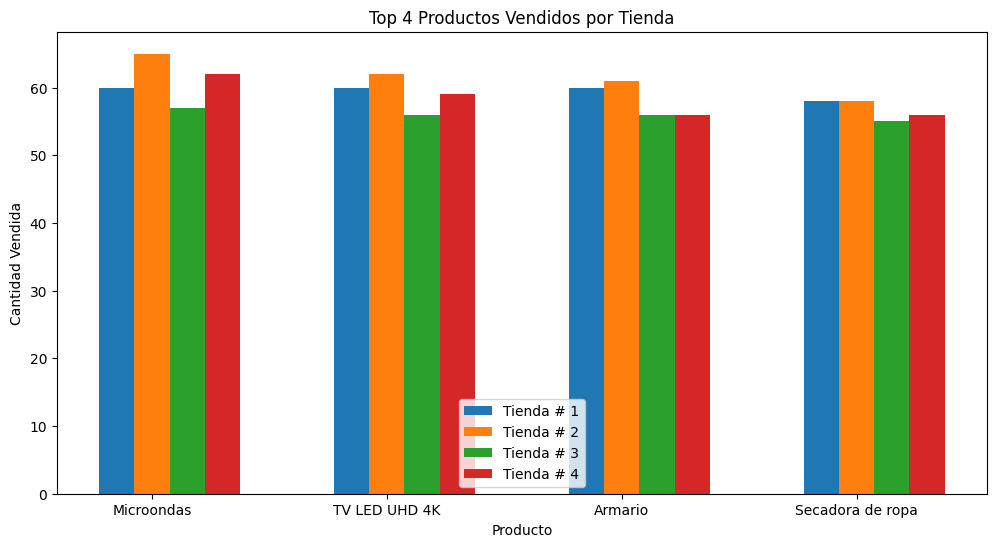

In [72]:
# gráfico de barras con los 4 primeros productos de cada tienda

top_products = {}

for nombre, df in tiendas.items():
    products = df['Producto'].value_counts().head(4)
    top_products[nombre] = products

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

width = 0.15
x = range(4)

for i, (nombre, products) in enumerate(top_products.items()):
    ax.bar([val + i * width for val in x], products.values, width, label=nombre)

ax.set_xticks([val + width for val in x])
ax.set_xticklabels(list(top_products['Tienda # 1'].index))
ax.set_xlabel("Producto")
ax.set_ylabel("Cantidad Vendida")
ax.set_title("Top 4 Productos Vendidos por Tienda")
ax.legend()

plt.show()


# 5. Envío promedio por tienda

In [6]:
Promedio = {
    'Tienda # 1': tienda,
    'Tienda # 2': tienda2,
    'Tienda # 3': tienda3,
    'Tienda # 4': tienda4
}

In [9]:
# costo promedio de envio por tienda

for nombre, df in Promedio.items():
    promedio_envio = df['Costo de envío'].mean()
    print(f"Costo de envío promedio en {nombre}: ¢ {promedio_envio:,.2f}")


Costo de envío promedio en Tienda # 1: ¢ 26,018.61
Costo de envío promedio en Tienda # 2: ¢ 25,216.24
Costo de envío promedio en Tienda # 3: ¢ 24,805.68
Costo de envío promedio en Tienda # 4: ¢ 23,459.46


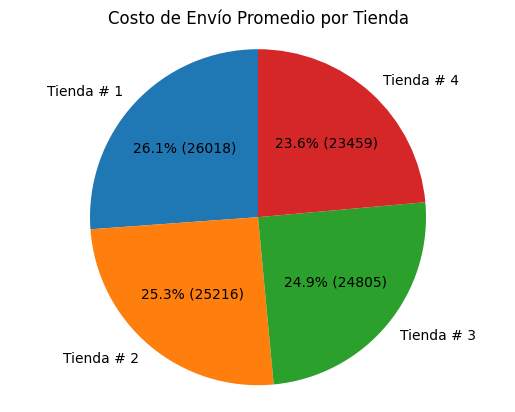

In [78]:
#Grafico circular con valores según el costo de envío promedio

# Datos de costo de envío promedio
promedio_envio = {
    'Tienda # 1': 26018.61,
    'Tienda # 2': 25216.24,
    'Tienda # 3': 24805.68,
    'Tienda # 4': 23459.46
}

#  gráfico circular
labels = promedio_envio.keys()
sizes = promedio_envio.values()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}% ({int(p * sum(sizes) / 100)})', startangle=90)
ax.axis('equal')
ax.set_title('Costo de Envío Promedio por Tienda')

plt.show()


In [ ]:
# /* Fortalezas Generales:
# Todas las tiendas tienen un fuerte desempeño en la categoría de electrónicos.
# Las ventas totales están muy cercanas entre las tiendas 1, 2 y 3.
#  Puntos Débiles por Tienda:
# Tienda 1
# Tiene el mayor costo de envío.
# Registra la menor satisfacción al cliente (menor puntuación y menos evaluaciones)y podría generar gastos de atención de posibles quejas.
# A pesar de buenas ventas, la bajo fidelización del cliente podría afectar a largo plazo.
# Tienda 4
# Tiene una unidad menos vendida que las demás.
# Sin embargo, posee el menor costo de envío y desempeño decente en satisfacción.
#  Conclusión:
# Aunque la tienda 4 tiene una leve diferencia negativa en ventas, la tienda 1 presenta más debilidades en aspectos críticos como:
# Satisfacción al cliente
# Costo operativo de envíos
#  Recomendación: Eliminar la Tienda 1 o bien capacitar al personas de la tienda o validar causa raíz y se debe optimizar costos en caso de continuar con la misma.*/
